For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [75]:
%load_ext autoreload
%autoreload 2

In [76]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

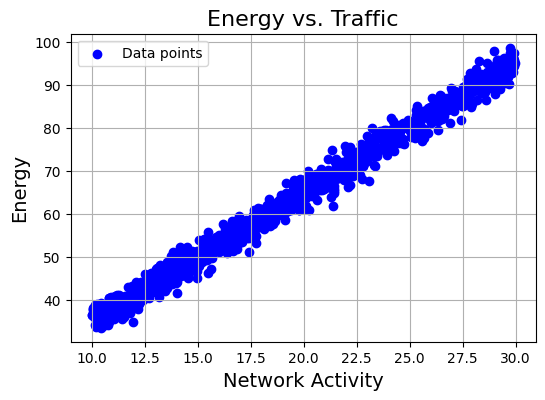

In [77]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

Oppgave 2a) Modellen kom fram til følgende lineære sammenheng mellom energi, E, og nettaktivitet, x: Energi = 3.11 x + 2.66


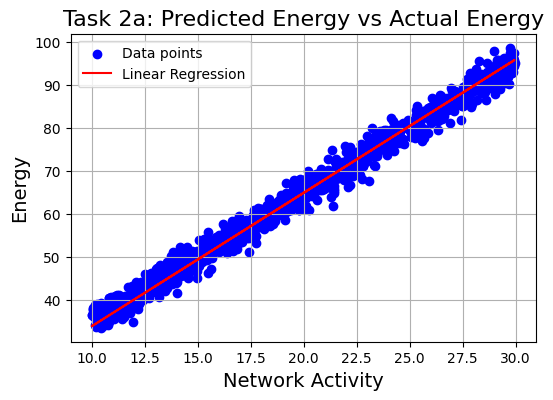

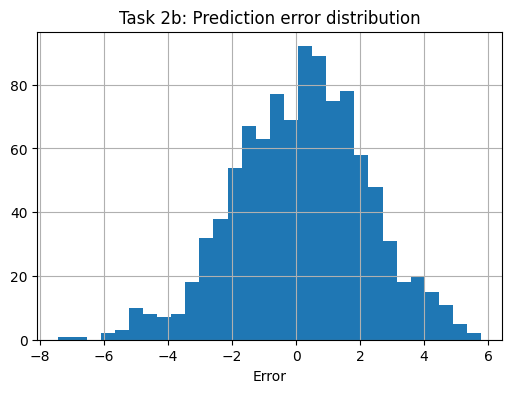

In [78]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], lr.predict(data['Net_Activity']), c='red', label='Linear Regression')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Task 2a: Predicted Energy vs Actual Energy', fontsize=16)
plt.legend()
plt.show()

error = - lr.predict(data['Net_Activity']) + data['Energy']
plt.figure(figsize=(6, 4))
plt.hist(error, bins=30)
plt.grid(True)
plt.xlabel('Error')
plt.title('Task 2b: Prediction error distribution')
plt.show()

Oppgave 2

a) Modellen kom fram til følgende lineære sammenheng mellom energi, E, og nettaktivitet, x: Energi = 3.11 x + 2.66. Plottet av lineær regresjonen ser man i figuren 'Task 2a: Predicted Energy vs Actual Energy'.

b) I figuren 'Task 2b: Prediction error distribution' ser man differansen mellom predicted verdi for energi, og den faktiske verdien for energi, også kalt residualene. Residualene ser ut til å være normalfordelt med forventningsverdi 0, samtidig som mesteparten av de havner innenfor et område på -2 og 2. Dette tyder på ganske god nøyaktighet, og at en lineær regresjon passer dataen. Det at residualene er normaltfordelt gjør at prediksjonen blir en forventningsrett estimator for energiforbruket. En forventningsrett estimator (unbiased estimator) er en estimator for en parameter der forventingsverdien er den sanne parameteren.

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

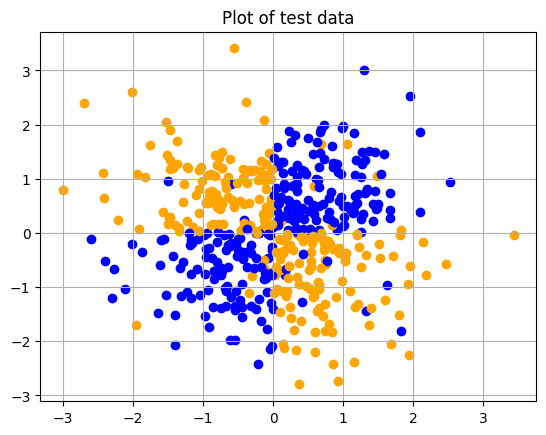

Modellens nøyaktighet med en ny feature:
0.9
Modellens nøyaktighet uten justeringer:
0.49
Beslutningstremodellens nøyaktighet med DecisionTreeClassifier:
0.876


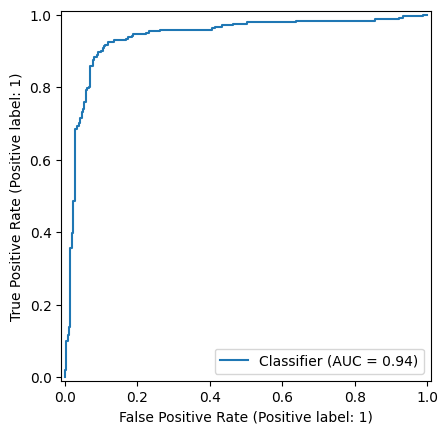

In [79]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

from logisitc_regression import LogisticRegression

lg_adjusted = LogisticRegression()
lg_adjusted.fit_lg(train, 2)

lg_not_adjusted = LogisticRegression()
lg_not_adjusted.fit_lg(train, 0)

x0 = test[['x0']].to_numpy()
x1 = test[['x1']].to_numpy()

y = test['y'].to_numpy()
#y_adjusted = np.array(lg_adjusted.predict_lg(test, 2))
#y_not_adjusted = np.array(lg_not_adjusted.predict_lg(test, 0))

for i in range(len(y)):
    if y[i] == 0:
        plt.scatter(x0[i], x1[i], c='blue', label='Negative class')
    else:
        plt.scatter(x0[i], x1[i], c='orange', label='Positive class')
plt.grid(True)
plt.title('Plot of test data')
plt.show()

"""
epochList = np.arange(0, lg_adjusted.epochs, 1)
plt.xlabel('Epoker')
plt.ylabel('Tapsfunksjon')
plt.title('Plott av tapsfunksjon over læringsepokene')
plt.grid(True)
plt.plot(epochList, lg_adjusted.losses, label='Loss')
plt.show()
print(lg_adjusted.losses[999])
"""

print('Modellens nøyaktighet med en ny feature:')
y_adjusted = np.array(lg_adjusted.predict_lg(test, 2))
print('Modellens nøyaktighet uten justeringer:')
y_not_adjusted = np.array(lg_not_adjusted.predict_lg(test, 0))

from sklearn.tree import DecisionTreeClassifier

mission2Tree = DecisionTreeClassifier(max_features=2)
mission2Tree.fit(train[['x0', 'x1']], train[['y']])
y_tree_pred = mission2Tree.predict(test[['x0', 'x1']])

print("Beslutningstremodellens nøyaktighet med DecisionTreeClassifier:")
print(np.mean(y == y_tree_pred))

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y, y_adjusted)
plt.show()

Oppgave 3

a) Til å begynne ble modellen trent på den ujusterte dataen. Plottet av dataen ser du i plottet Plot of test data rett over. Uansett valg av hyperparametre, ga dette en nøyaktighet rundt 50%. Siden dataen er balansert mellom klassene, var en nøyaktighet på 50% så og si vill gjetting. Det er fordi modellen prøvde å finne en lineær sammenheng mellom dataen og klassene y, selv om plottet over tydelig viser at dataen legger seg i et XOR-mønster, noe ulineært. Løsningen var da å legge til en ekstra feature x_2 som var x_0 ganget med x_1. Det var fordi i den positive klassen ser vi fra plottet at kun en av x-ene vil være negativ, mens i den negative klassen var enten begge x-ene negativ eller begge positiv. x_2 ville da være negativ for den positive klassen, og positiv for den negative klassen. Dette ga en nøyaktighet på 90%.

b) Modellens induktive bias er antakelsen om at det finnes en lineær kombinasjon av featurene er tilstrekkelig for å klassifisere de. Den er viktig fordi det er denne antakelsen den bruker for å predikere usett data.

c) Scikit sin DecisionTreeClassifier var i stand til å løse problemet også med en nøyaktighet på 87,6% uten å legge til en ekstra feature. Sammenliknet med den logistisk regresjonsmodellen så har ikke et beslutningstre en induktiv bias om at en lineærkombinasjon av inputdata skal kunne skille mellom klassene. En slik modell har som induktiv bias at det finnes terskler på hver feature som dataen kan separeres på.

d) ROC-kurven ligger over.

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

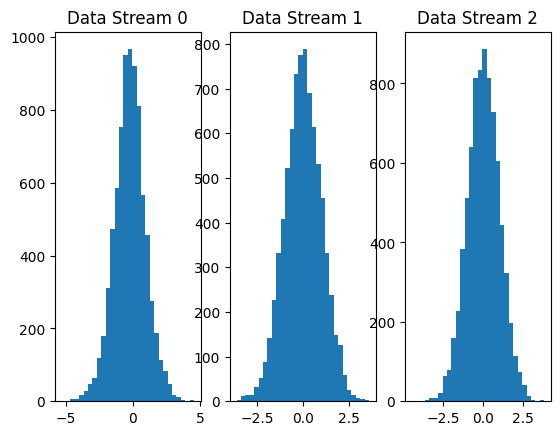

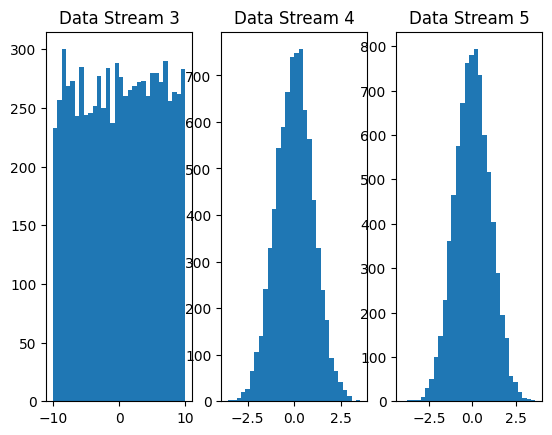

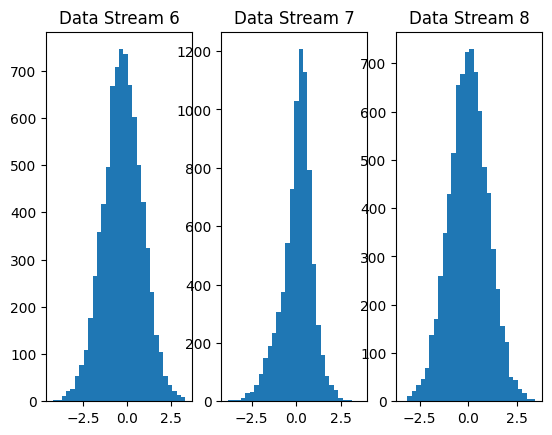

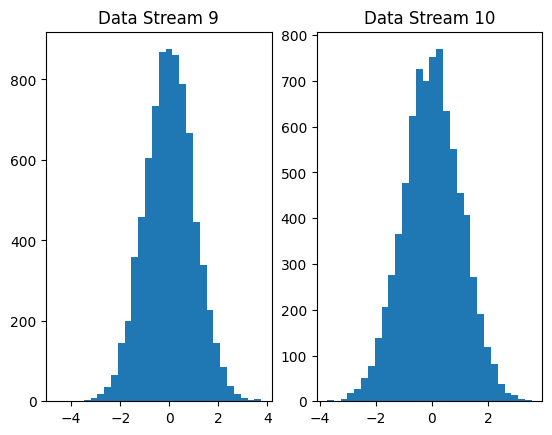

In [80]:
#Henter ut train og test
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

train.describe()

fig1, axes = plt.subplots(1, 3)
axes[0].hist(train['data_stream_0'], bins=30)
axes[0].set_title('Data Stream 0')
axes[1].hist(train['data_stream_1'], bins=30)
axes[1].set_title('Data Stream 1')
axes[2].hist(train['data_stream_2'], bins=30)
axes[2].set_title('Data Stream 2')
plt.show()
fig2, axes = plt.subplots(1, 3)
axes[0].hist(train['data_stream_3'], bins=30)
axes[0].set_title('Data Stream 3')
axes[1].hist(train['data_stream_4'], bins=30)
axes[1].set_title('Data Stream 4')
axes[2].hist(train['data_stream_5'], bins=30)
axes[2].set_title('Data Stream 5')
plt.show()
fig3, axes = plt.subplots(1, 3)
axes[0].hist(train['data_stream_6'], bins=30)
axes[0].set_title('Data Stream 6')
axes[1].hist(train['data_stream_7'], bins=30)
axes[1].set_title('Data Stream 7')
axes[2].hist(train['data_stream_8'], bins=30)
axes[2].set_title('Data Stream 8')
plt.show()
fig4, axes = plt.subplots(1, 2)
axes[0].hist(train['data_stream_9'], bins=30)
axes[0].set_title('Data Stream 9')
axes[1].hist(train['data_stream_10'], bins=30)
axes[1].set_title('Data Stream 10')
plt.show()

Beste hyperparametre for normal decisionTreeClassifier:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Normal DecisionTreeClassifier ROC AUC score var:  0.7239664592843705


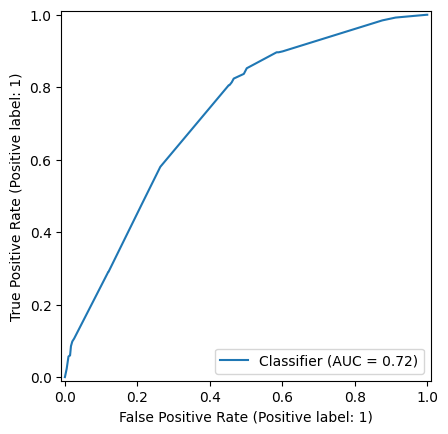

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay, roc_auc_score
from sklearn.model_selection import GridSearchCV

#Definerer området modellen skal finne de beste hyperparametrene fra
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(1, 10, 1),
    'min_samples_split': range(2, 20, 2),
    'min_samples_leaf': range(1, 10, 1)
}

#Skalerer data stream 3 for både train og test
stream_name = 'data_stream_3'

scaledTrainStream3 = np.array([1 if (round(i*1000) % 2) == 0 else 0 for i in train[stream_name].to_numpy()])
scaledTrainStream3 = scaledTrainStream3.reshape((len(scaledTrainStream3), 1))
scaledTestStream3 = np.array([1 if (round(i*1000) % 2) == 0 else 0 for i in test[stream_name].to_numpy()])
scaledTestStream3 = scaledTestStream3.reshape((len(scaledTestStream3), 1))
target = test[['target']]

#Erstatter uskalert feature 3 med skalert feature 3
trainModel = train[['data_stream_0', 'data_stream_1', 'data_stream_2']].to_numpy()
trainModel = np.hstack((trainModel, scaledTrainStream3))
temp = train[['data_stream_4', 'data_stream_5', 'data_stream_6', 'data_stream_7', 'data_stream_8', 'data_stream_9', 'data_stream_10']]
trainModel = np.hstack((trainModel, temp))

testModel = test[['data_stream_0', 'data_stream_1', 'data_stream_2']].to_numpy()
testModel = np.hstack((testModel, scaledTestStream3))
temp = test[['data_stream_4', 'data_stream_5', 'data_stream_6', 'data_stream_7', 'data_stream_8', 'data_stream_9', 'data_stream_10']]
testModel = np.hstack((testModel, temp))

#Lager beslutningstremodell med beste hyperparametre
clf = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(trainModel, train[['target']])
print("Beste hyperparametre for normal decisionTreeClassifier: ", grid.best_params_)
final_model = grid.best_estimator_

print("Normal DecisionTreeClassifier ROC AUC score var: ", 
      roc_auc_score(target, final_model.predict_proba(testModel)[:, 1]))
RocCurveDisplay.from_predictions(target, final_model.predict_proba(testModel)[:, 1])
plt.show()

In [82]:
#Området for hyperparametre til random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

param_grid_rand = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy', 'log_loss']
}

model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid_rand, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(trainModel, train['target'])
final_rand_model = grid_search.best_estimator_
print("RandomForestClassifier ROC AUC score var: ", 
      roc_auc_score(target, final_rand_model.predict_proba(testModel)[:, 1]))

RandomForestClassifier ROC AUC score var:  0.7332087755455823


Oppgave 2

a) Ved å kun dekryptere stream 3 og bruke default parametre ga det en for lav ROC AUC. Den ble ca. 0,65. Dette tydet på at hyperparametrene måtte justeres, men siden det er såpass mange hyperparametre så valgte jeg å bruke GridSearchCV for å hjelpe meg å finne de beste. Modellen kan nok få en mye bedre ROC AUC, men en grid search tok lang tid så jeg stoppet da kravet var nådd.

b) ROC AUC er fin måte å evaluere på siden den ikke kun fokuserer på antall riktige, men hvor mange man feilklassifiserer også. En modell vil få 100% riktig på antall i den positive klassen hvis den gjetter at alt er i den positive klassen. I tillegg er False Positive Rate, også kjent som type 1 feil, ofte kjent som den verste feilen. Derfor gir det et godt bilde på hvor god modellen er ved å vise akkurat det for ulike terskler. Plottet og ROC AUC beslutningstre modellen ser man litt over denne boblen. ROC AUC er arealet under kurven, og i denne modellen ble den 0,7239. En ROC AUC på 1 betyr perfekt klassifisering og at ingen blir feilklassifisert, mens en ROC AUC på 0,5 betyr tilfeldig gjetning. Vår modell er da på den litt lavere siden, og kunne derfor vært litt høyere.

c) RandomForestClassifier ble tunet med GridSearchCV, men med et mindre utvalg av parametre. Det er fordi det ville tatt veldig lang tid å finne de perfekte, men med de modellen fikk, fikk den 0,7332. Selv om dette ikke er betydelig mye bedre, er det bemerkelsesverdig at den ble den ble bedre med et mindre utvalg av hyperparametre. Dette viser hvordan ensembler funker godt.

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [83]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

train.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,14455.000000,2.328500e+04,23285.000000,18564.000000,19403.000000,23285.000000,23285.000000,5643.000000,12192.000000,19413.000000,19413.000000,15213.000000,15213.000000,12765.000000,12765.000000,13475.000000,23205.000000
mean,1.875683,2.355617e+07,74.450999,12.552279,38.741367,8.969594,2.189349,1.039695,3.268374,0.737547,0.662855,0.797147,0.468678,0.556365,0.673090,1.270501,1.162293
std,1.089518,5.264393e+07,58.671373,6.565686,31.398480,8.322039,1.076130,0.351507,10.802728,0.781173,0.716888,0.402137,0.499034,0.641257,0.664779,1.017037,0.456937
min,0.000000,9.000000e+05,9.300000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.490000e+06,42.000000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.064500e+07,59.800000,10.700000,30.900000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,3.000000,2.050000e+07,84.800000,15.300000,45.300000,12.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,2.600000e+09,2181.000000,100.000000,900.000000,95.000000,6.000000,2.000000,340.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000


In [84]:
test.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,5995.000000,9937.000000,7704.000000,7918.000000,9937.000000,9937.000000,2569.000000,4919.000000,8220.000000,8220.000000,6449.000000,6449.000000,5102.000000,5102.000000,5978.000000,9897.000000,9.937000e+03
mean,1.805838,75.144219,12.874883,39.500515,9.184160,2.202878,1.036201,3.725885,0.776642,0.611922,0.809273,0.438518,0.584673,0.632301,1.259284,1.175003,2.327010e+07
std,1.087742,56.359318,6.878015,33.145228,7.963073,1.107315,0.334674,15.915162,0.811608,0.709386,0.392905,0.496244,0.645422,0.669174,1.041879,0.462727,4.345831e+07
min,0.000000,13.000000,1.200000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+06
25%,1.000000,42.400000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.599000e+06
50%,2.000000,59.600000,10.800000,31.000000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.100000e+07
75%,3.000000,86.000000,16.000000,45.400000,13.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.074351e+07
max,3.000000,1175.000000,63.600000,528.000000,69.000000,6.000000,2.000000,350.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000,9.285855e+08


In [85]:
#Ser at ownership_type har samme karakteristikk i begge datasett, men resten i train ser ut til å dele karakteristikk
# med featuren til venstre for seg i test. Mens nexus_rating ser ut til å dele karakteristikk med den siste featuren
# i test. Alt i testdatasettet utenom siste feature og ownership_type må altså flyttes et hakk til høyre, og siste 
# feature til nexus_rating.

#Redigerer testdata
train_features = train[['ownership_type', 'energy_footprint', 'core_reactor_size', 'harvesting_space', 
                        'vertical_alignment', 'power_chambers', 'energy_flow_design', 'upper_collector_height',
                        'shared_conversion_units', 'isolated_conversion_units', 'internal_collectors',
                        'external_collectors', 'ambient_harvesters', 'shielded_harvesters', 'efficiency_grade',
                        'grid_connections']].to_numpy()
train_target = train['nexus_rating'].to_numpy()

test_features = test[['ownership_type', 'nexus_rating', 'energy_footprint', 'core_reactor_size',
                      'harvesting_space', 'vertical_alignment', 'power_chambers', 'energy_flow_design',
                      'upper_collector_height', 'shared_conversion_units', 'isolated_conversion_units',
                      'internal_collectors', 'external_collectors', 'ambient_harvesters', 'shielded_harvesters',
                      'efficiency_grade']].to_numpy()
test_target = test['grid_connections'].to_numpy()

Text(0, 0.5, 'Count')

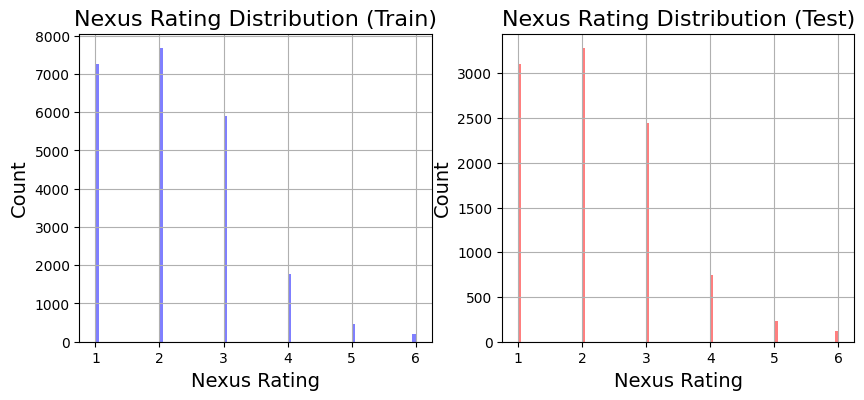

In [86]:
featureName = 'power_chambers'

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
train[featureName].hist(bins=100, ax=ax[0], color='blue', alpha=0.5, label='Train Target Distributuon')
ax[0].set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax[0].set_xlabel('Nexus Rating', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)

test['vertical_alignment'].hist(bins=100, ax=ax[1], color='red', alpha=0.5, label='Test Target Distribution')
ax[1].set_title('Nexus Rating Distribution (Test)', fontsize=16)
ax[1].set_xlabel('Nexus Rating', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)

In [87]:

from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [88]:
# Example rmsle check
#test['pred'] = 0
#print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
#print('Required RMSLE: ', 0.294)

from sklearn.ensemble import HistGradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

param_grid_hgb = {
    'learning_rate': [0.1],
    'max_iter': [300],
    'loss': ['poisson'],
    'max_leaf_nodes': [48],
    'min_samples_leaf': [21]
}

# HistGradBoostingRegressor når ikke ønsket RMSLE helt
#model_hgb = HistGradientBoostingRegressor()
#grid_hgb = GridSearchCV(estimator=model_hgb, param_grid=param_grid_hgb, 
#                    cv=5, n_jobs=-1, error_score='raise', scoring='neg_root_mean_squared_log_error')
#grid_hgb.fit(train_features, np.log1p(train_target))
#final_model_grad_boost = grid_hgb.best_estimator_
#print("Beste hyperparametre for HistGradientBoostingRegressor: ", grid_hgb.best_params_)
#print("RMSLE for HistGradientBoostingRegressor: ", rmsle(test_target, np.expm1(final_model_grad_boost.predict(test_features))))


param_grid_cb = {
    'iterations': [960],
    'learning_rate': [0.055],
    'depth': [10],
    'loss_function': ['RMSE']
}
model_cb = CatBoostRegressor(verbose=False, random_seed=46)
grid_cb = GridSearchCV(estimator=model_cb, param_grid=param_grid_cb, cv=5, n_jobs=4, error_score='raise', scoring='neg_root_mean_squared_log_error')
grid_cb.fit(train_features, np.log1p(train_target))
final_cb = grid_cb.best_estimator_
print("Beste hyperparametre for CatBoostRegressor: ", grid_cb.best_params_)
print("RMSLE for CatBoostRegressor: ", rmsle(test_target, np.expm1(np.array(final_cb.predict(test_features)))))


Beste hyperparametre for CatBoostRegressor:  {'depth': 10, 'iterations': 960, 'learning_rate': 0.055, 'loss_function': 'RMSE'}
RMSLE for CatBoostRegressor:  0.29379669898775823


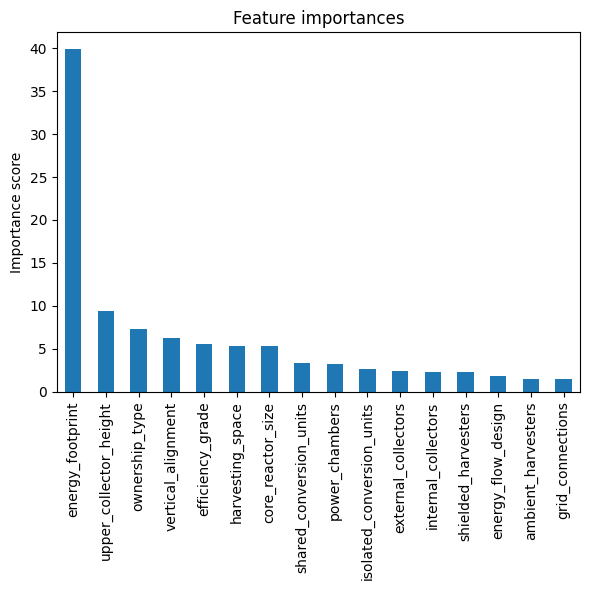

In [89]:
importances = final_cb.get_feature_importance()
feature_names = pd.Series(['ownership_type', 'energy_footprint', 'core_reactor_size', 'harvesting_space',
                           'vertical_alignment', 'power_chambers', 'energy_flow_design', 'upper_collector_height',
                           'shared_conversion_units', 'isolated_conversion_units', 'internal_collectors',
                           'external_collectors', 'ambient_harvesters', 'shielded_harvesters', 'efficiency_grade',
                           'grid_connections'])

fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(6,6))
fi.plot(kind='bar')
plt.title('Feature importances')
plt.ylabel('Importance score')
plt.tight_layout()
plt.show()

Oppgave 2

a) Min threshold-breaking strategi var først å la ensemblen trene på en logtransform av target siden verdiene på der var veldig store ift. verdiene i i featurene. Logtransformen var for å skalere ned target til mer jevne tall. Så fortsatte jeg med å bruke 5-fold cross-validation for å finne det beste hyperparametrene. Dette krevde også litt tuning fra meg. Først prøvde jeg med HistGradientBoostingRegressor siden den kan håndtere alle de NaN verdiene det var å finne i datasettet. Tuning kom under 0.3, men aldri helt under 0.294. Dette kan ha vært et tegn på overfitting. Derfor var det hensiktsmessig å prøve å unngå akkurat det. CatBoostRegressor var da svaret. En slik ensemble håndterer NaN også, men vil i tillegg være bedre rustet mot overfitting. Denne ble tunet på samme måte, selv om det tok enda lenger tid.

b) Bruken av RMSLE er nødvendig her fordi target er veldig store verdier. Det vil si at en feil på 100 egentlig ikke er så stort relativt til verdiene i target. RMSLE vil da gi mer fornuftige tall siden log-en vil skalere store verdier drastisk ned. Her endte vi opp med å bruke RMSE som tapsfunksjonen, noe som morsomt nok teknisk sett blir en RMSLE fordi modellen måtte trenes på en logtransform av target og dermed også gir logtransformen av hva vi ønsker å predikere.

c) Feature importance er et mål på hvor mye en feature ble brukt til å splitte data i trærne, og hvor mye den forbedret prediksjonen når den ble brukt. energi_footprint. En lav importance kan tyde på at featuren kanskje kan fjernes siden den ikke får så stor innflytelse.

d) Siden datasettet inneholdt mange NaN som så tilsynelatende helt tilfeldig ut, måtte jeg bruke en ensemble som kunne håndtere det. Det som dukket opp da var HistGradBoosting og CatBoost. Begge er sekvensielle ensembler, der hver modell i ensemblen prøver å rette på feilen til den forrige. HistGradBoosting strakk akkurat ikke til uansett hvordan jeg tunet, noe som kan ha tydet på overfitting.

e) I virkeligheten hvor man ikke har testdata, ville jeg brukt valideringsdata. Det er så og si sånn jeg har måttet bruke testdata gjennom hele dette prosjektet.